In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from src.utils import read_jsonl

In [2]:
gold_rank = {"POSITIF":3, "NEGATIF":2, "NEUTRAL":0, "CIVILITY":1, 'NULL':-1}
def get_gold(gold):
    max_g = 'NULL'
    for g in gold:
        if gold_rank[g] > gold_rank[max_g]:
            max_g = g
    return max_g

In [3]:
def report(trues, preds):
    print(classification_report(trues, preds))
    labels = sorted(list(set(trues)))
    convert = {0:'POSITIF', 1:'NEUTRAL', 2:'NEGATIF'}
    if isinstance(labels[0], int):
        labels = [convert[l] for l in labels]
    disp = ConfusionMatrixDisplay(confusion_matrix(trues, preds), display_labels=labels)
    fig, ax = plt.subplots(figsize=(10,5))
    disp.plot(ax=ax, xticks_rotation = 45)
    plt.show()

In [4]:
def evaluate_hypothesis(
        docs, 
        gold_to_pred = {"POSITIF":0, "NEGATIF":2, "NEUTRAL":1, "CIVILITY":1, 'NULL':1}
    ):
    trues, preds, golds = [], [], []
    for doc in docs:
        gold = get_gold(doc['gold'])
        preds.append(doc['labels'][0])
        golds.append(gold)
        trues.append(gold_to_pred[gold])
    report(trues, preds)
    return trues, preds, golds

def evaluate_classification(docs, pred_to_gold = {"est d'accord avec":"POSITIF", "n'est pas d'accord avec":"NEGATIF", "est neutre avec":"NEUTRAL", "remercie":"CIVILITY"}):
    trues, preds, golds = [], [], []
    sub_labels = {"POSITIF":"POSITIF", "NEGATIF":"NEGATIF", "NEUTRAL":"NEUTRAL", "CIVILITY":"NEUTRAL", 'NULL':"NEUTRAL"}
    for doc in docs:
        gold = get_gold(doc['gold'])
        preds.append(sub_labels[pred_to_gold[doc['labels'][0]]])
        golds.append(gold)
        trues.append(sub_labels[gold])
    report(trues, preds)
    return trues, preds, golds


              precision    recall  f1-score   support

           0       0.72      0.74      0.73       134
           1       0.68      0.62      0.65       109
           2       0.58      0.63      0.60        70

    accuracy                           0.67       313
   macro avg       0.66      0.66      0.66       313
weighted avg       0.68      0.67      0.67       313



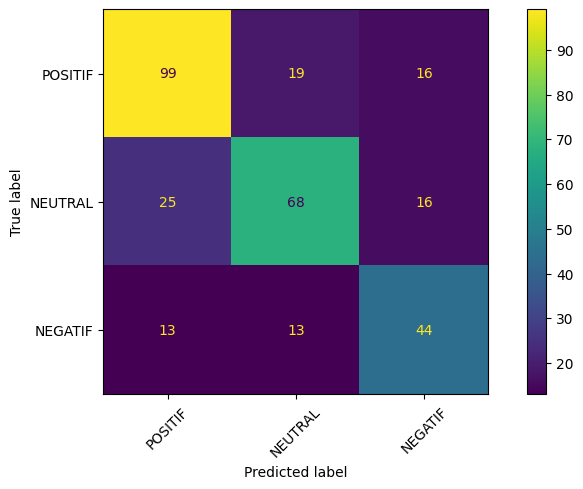

In [5]:
docs = read_jsonl('data/zeroshot/camembert-base-xnli_h_est_full.jsonl',)
trues, preds, golds = evaluate_hypothesis(
    docs, 
    gold_to_pred = {"POSITIF":0, "NEGATIF":2, "NEUTRAL":1, "CIVILITY":1, 'NULL':1}
)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       134
           1       0.75      0.68      0.71       109
           2       0.62      0.60      0.61        70

    accuracy                           0.72       313
   macro avg       0.70      0.69      0.70       313
weighted avg       0.72      0.72      0.71       313



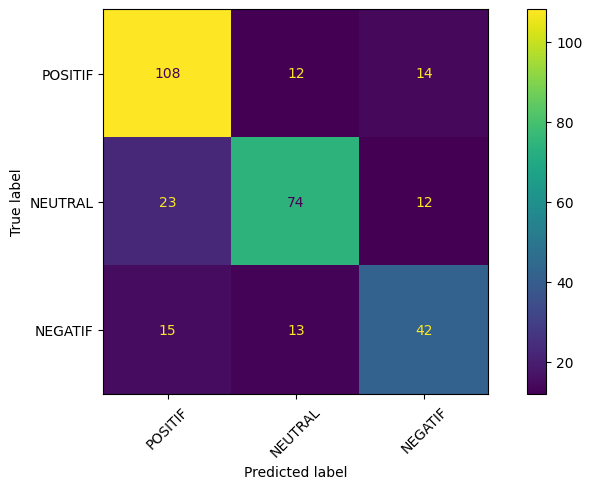

In [6]:
docs = read_jsonl('data/zeroshot/camembert-base-xnli_h_semble_full.jsonl',)
trues, preds, golds = evaluate_hypothesis(
    docs, 
    gold_to_pred = {"POSITIF":0, "NEGATIF":2, "NEUTRAL":1, "CIVILITY":1, 'NULL':1}
)

In [7]:
rows = []
for doc in docs:
    rows.append((doc['speaker'], doc['target'], doc['gold'][0]))
df = pd.DataFrame(rows, columns=['speaker', 'target', 'type'])
df['type'].value_counts()

POSITIF     134
NEGATIF      70
NEUTRAL      65
CIVILITY     32
NULL         12
Name: type, dtype: int64

In [8]:
df['type'].value_counts().sum()


313

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       134
           1       0.75      0.65      0.70       109
           2       0.61      0.57      0.59        70

    accuracy                           0.71       313
   macro avg       0.69      0.68      0.68       313
weighted avg       0.71      0.71      0.70       313



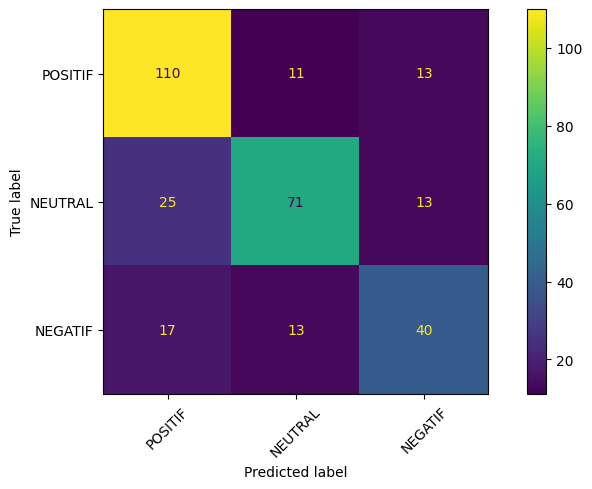

In [9]:
docs = read_jsonl('data/zeroshot/camembert-base-xnli_h_semble_name.jsonl',)
trues, preds, golds = evaluate_hypothesis(
    docs, 
    gold_to_pred = {"POSITIF":0, "NEGATIF":2, "NEUTRAL":1, "CIVILITY":1, 'NULL':1}
)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       134
           1       0.82      0.61      0.70       109
           2       0.61      0.66      0.63        70

    accuracy                           0.72       313
   macro avg       0.71      0.70      0.70       313
weighted avg       0.73      0.72      0.71       313



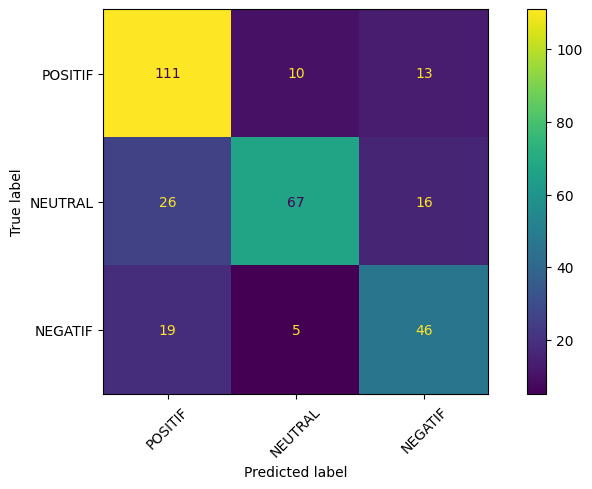

In [10]:
docs = read_jsonl('data/zeroshot/camembert-base-xnli_h_semble_chunk_.jsonl',)
trues, preds, golds = evaluate_hypothesis(
    docs, 
    gold_to_pred = {"POSITIF":0, "NEGATIF":2, "NEUTRAL":1, "CIVILITY":1, 'NULL':1}
)

In [11]:
neutral_positif_errors = []
for d, t, p in zip(docs, trues, preds):
    if t == 1 and p != 1:
        neutral_positif_errors.append((p, d['gold'][0]))
    #     print(f"\n# {d['pv']}_{d['ut_id']} {d['speaker']}, {d['target']} {d['gold']} { {l:s for l, s in zip(d['labels'], d['scores'])} } #")
    #     print(f"# {d['hypothesis']} #\n")
    #     print(d['context'])
pd.Series(neutral_positif_errors).value_counts()

(0, CIVILITY)    15
(0, NEUTRAL)     10
(2, NEUTRAL)      9
(2, NULL)         7
(0, NULL)         1
dtype: int64

In [12]:
for d, t, p in zip(docs, trues, preds):
    if t == 2 and p == 0:
        print(f"\n# {d['pv']}_{d['ut_id']} {d['speaker']}, {d['target']} {d['gold']} { {l:s for l, s in zip(d['labels'], d['scores'])} } #")
        print(f"# {d['hypothesis']} #\n")
        print(d['context'])


# PV1980-05-14_9 #segalat_andre, #lecourt_robert ['NEGATIF'] {0: [0.8453722596168518, 0.12843473255634308, 0.02619297429919243]} #
# Le locuteur semble d'accord avec LECOURT #

Monsieur SEGALAT . Monsieur LECOURT , semble -t -il , cherche à caractériser la procédure fiscale par l' importance des conséquences que peuvent avoir les procès pour le contribuable . N' oublions pas que les procès civils peuvent mettre en cause le patrimoine d' un citoyen d' une façon tout aussi grave . Pourtant la procédure est règlementaire . Il cherche encore à caractériser cette procédure par le fait que certaines règles seraient protectrices mais les délais , forclusions , etc ... et autres règles y sont , comme toute procédure , destinée à protéger des intérêts en cause et ce sont des institutions inhérentes à la procédure elle-même . On ne voit pas pourquoi la procédure fiscale aurait un sort différent de la procédure civile ou administrative alors qu' elle ne met pas en cause d' intérêts exceptionnels

              precision    recall  f1-score   support

           0       0.69      0.83      0.76       134
           1       0.82      0.60      0.69       109
           2       0.61      0.64      0.62        70

    accuracy                           0.71       313
   macro avg       0.71      0.69      0.69       313
weighted avg       0.72      0.71      0.70       313



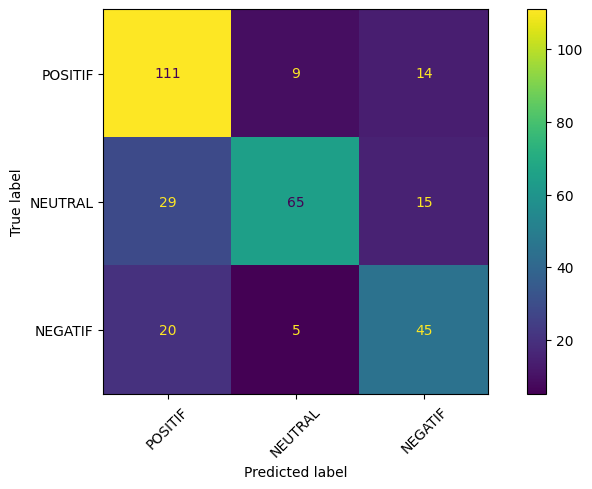

In [13]:
docs = read_jsonl('data/zeroshot/camembert-base-xnli_h_semble_chunk_name.jsonl',)
trues, preds, golds = evaluate_hypothesis(
    docs, 
    gold_to_pred = {"POSITIF":0, "NEGATIF":2, "NEUTRAL":1, "CIVILITY":1, 'NULL':1}
)

              precision    recall  f1-score   support

           0       0.90      0.56      0.69       124
           1       0.64      0.85      0.73        89
           2       0.55      0.72      0.62        60

    accuracy                           0.69       273
   macro avg       0.70      0.71      0.68       273
weighted avg       0.74      0.69      0.69       273



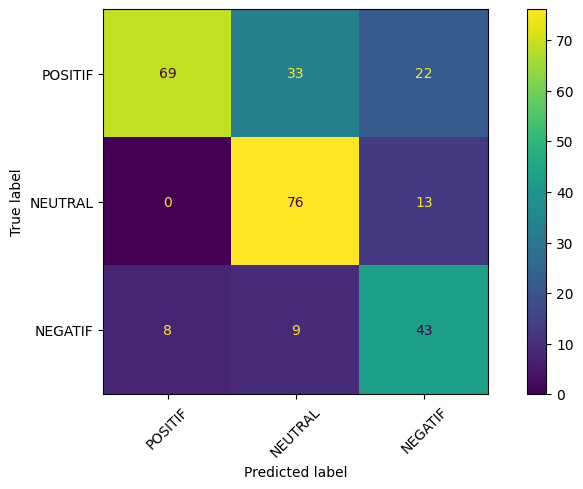

In [14]:
docs = read_jsonl('data/zeroshot/justal_fs_h_semble_chunk.jsonl',)
trues, preds, golds = evaluate_hypothesis(
    docs, 
    gold_to_pred = {"POSITIF":0, "NEGATIF":2, "NEUTRAL":1, "CIVILITY":1, 'NULL':1}
)

              precision    recall  f1-score   support

           0       0.92      0.45      0.61       132
           1       0.79      0.67      0.72       105
           2       0.40      0.88      0.55        68

    accuracy                           0.62       305
   macro avg       0.70      0.67      0.63       305
weighted avg       0.76      0.62      0.63       305



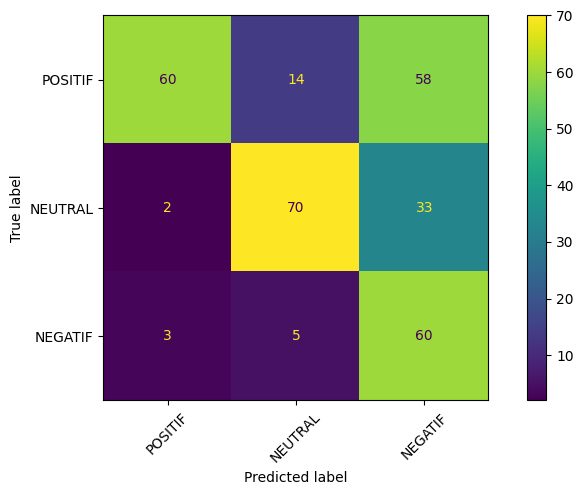

In [15]:
docs = read_jsonl('data/zeroshot/justal_fs_h2_semble_chunk.jsonl',)
trues, preds, golds = evaluate_hypothesis(
    docs, 
    gold_to_pred = {"POSITIF":0, "NEGATIF":2, "NEUTRAL":1, "CIVILITY":1, 'NULL':1}
)

In [16]:
for d, t, p in zip(docs, trues, preds):
    if t != p:
        print(f"\n# {d['pv']}_{d['ut_id']} {d['speaker']}, {d['target']} {d['gold']} { {l:s for l, s in zip(d['labels'], d['scores'])} } #")
        print(f"# {d['hypothesis']} #\n")
        print(d['context'])


# PV1983-07-19_2 #marcilhacy_pierre, #vedel_georges ['POSITIF'] {2: [0.22765213251113892, 0.29290342330932617, 0.4794444143772125]} #
# Le locuteur semble d'accord avec VEDEL #

Monsieur MARCILHACY pour sa part , s' associe aux observations de Monsieur VEDEL . Il rappelle qu' en tant que parlementaire , il s' est toujours insurgé contre la pratique du Gouvernement qui consiste à " faire des boulettes " et demande ensuite au Parlement de balayer . Sans doute , le Gouvernement est -il ennuyé - et je suis poli - mais il faut lui faire comprendre que ce petit jeu ne peut plus continuer .

# PV1981-10-30-31_0 #vedel_georges, #joxe_louis ['POSITIF'] {2: [0.020450644195079803, 0.05346742644906044, 0.9260819554328918]} #
# Le locuteur semble d'accord avec JOXE #

Monsieur Georges VEDEL regrette que dans cette loi , par - delà une différence réelle dans les situations , on semble instituer une hiérarchie des lois anciennes , les moins appréciées se voyant dénier le caractère de lois de la Répu

              precision    recall  f1-score   support

     NEGATIF       0.55      0.64      0.59        70
     NEUTRAL       0.68      0.55      0.61       109
     POSITIF       0.67      0.72      0.69       134

    accuracy                           0.64       313
   macro avg       0.63      0.64      0.63       313
weighted avg       0.65      0.64      0.64       313



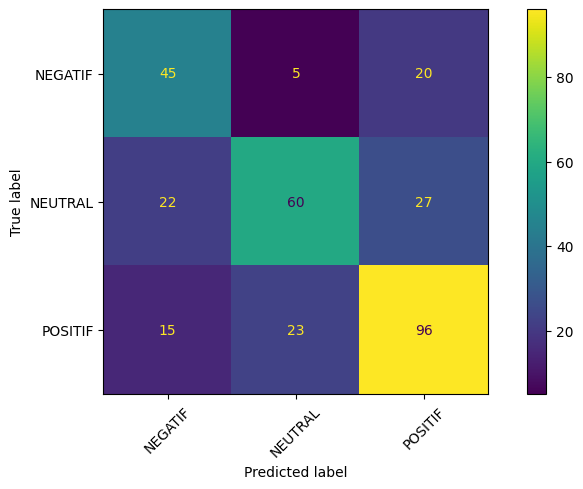

In [17]:
docs = read_jsonl("data/zeroshot/camembert-base-xnli_c_est_sent_.jsonl")
trues, preds, golds = evaluate_classification(
    docs,
    pred_to_gold= {
        "est d'accord avec":"POSITIF", 
        "n'est pas d'accord avec":"NEGATIF", 
        "est neutre avec":"NEUTRAL", 
        "remercie":"NEUTRAL"
    }
)

              precision    recall  f1-score   support

     NEGATIF       0.55      0.69      0.61        70
     NEUTRAL       0.80      0.51      0.63       109
     POSITIF       0.69      0.80      0.74       134

    accuracy                           0.67       313
   macro avg       0.68      0.67      0.66       313
weighted avg       0.70      0.67      0.67       313



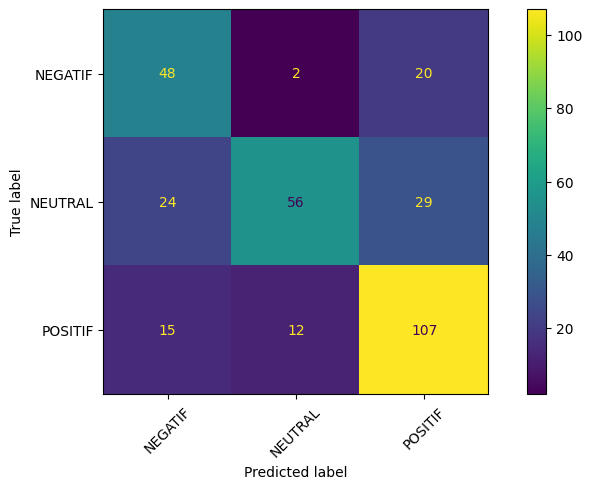

In [18]:
docs = read_jsonl("data/zeroshot/camembert-base-xnli_c_semble_sent_.jsonl")
trues, preds, golds = evaluate_classification(
    docs,
    pred_to_gold= {
        "semble d'accord avec":"POSITIF", 
        "semble en désaccord avec":"NEGATIF", 
        "semble neutre avec":"NEUTRAL", 
        "semble remercier":"NEUTRAL"
    }
)

              precision    recall  f1-score   support

     NEGATIF       0.48      0.18      0.27        60
     NEUTRAL       0.29      0.51      0.37        89
     POSITIF       0.45      0.34      0.39       124

    accuracy                           0.36       273
   macro avg       0.41      0.34      0.34       273
weighted avg       0.40      0.36      0.35       273



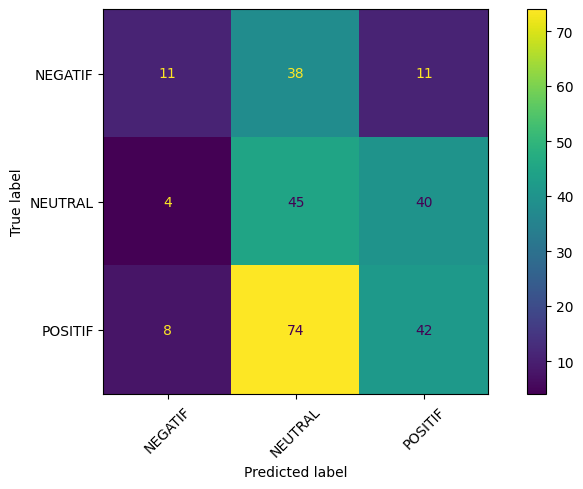

In [19]:
docs = read_jsonl("data/zeroshot/justal_fs_cls_semble_chunk.jsonl")
trues, preds, golds = evaluate_classification(
    docs,
    pred_to_gold= {
        "semble d'accord avec":"POSITIF", 
        "semble en désaccord avec":"NEGATIF", 
        "semble neutre avec":"NEUTRAL", 
        "semble remercier":"NEUTRAL"
    }
)

              precision    recall  f1-score   support

     NEGATIF       0.46      0.71      0.56        70
     NEUTRAL       0.84      0.50      0.62       109
     POSITIF       0.70      0.74      0.72       134

    accuracy                           0.65       313
   macro avg       0.67      0.65      0.64       313
weighted avg       0.70      0.65      0.65       313



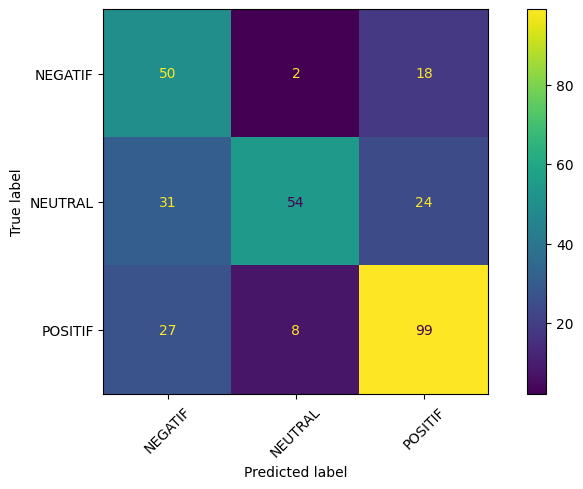

In [21]:
docs = read_jsonl("data/zeroshot/camembert-base-xnli_c_semble_chunk_.jsonl")
trues, preds, golds = evaluate_classification(
    docs,
    pred_to_gold= {
        "semble d'accord avec":"POSITIF", 
        "semble en désaccord avec":"NEGATIF", 
        "semble neutre avec":"NEUTRAL", 
        "semble remercier":"NEUTRAL"
    }
)

              precision    recall  f1-score   support

     NEGATIF       0.46      0.73      0.57        70
     NEUTRAL       0.86      0.50      0.63       109
     POSITIF       0.70      0.73      0.72       134

    accuracy                           0.65       313
   macro avg       0.67      0.65      0.64       313
weighted avg       0.70      0.65      0.65       313



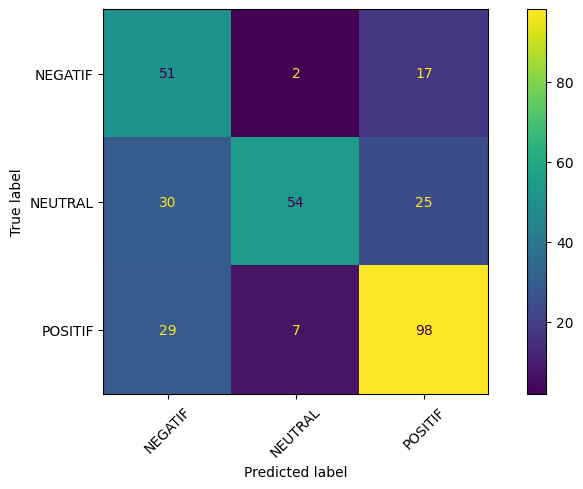

In [22]:
docs = read_jsonl("data/zeroshot/camembert-base-xnli_c_semble_chunk_name.jsonl")
trues, preds, golds = evaluate_classification(
    docs,
    pred_to_gold= {
        "semble d'accord avec":"POSITIF", 
        "semble en désaccord avec":"NEGATIF", 
        "semble neutre avec":"NEUTRAL", 
        "semble remercier":"NEUTRAL"
    }
)